In [2]:
#Importing relevant packages

import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
%matplotlib inline

In [83]:
%%time
#fraudp = pd.read_csv('WithCreatedVariables.csv')

Wall time: 0 ns


In [84]:
#fraudp.shape

In [85]:
#fraudp.head(10)

In [3]:
frauds = pd.read_csv('Desktop_principalscores.csv')

In [4]:
frauds.head(5)

,Unnamed: 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0,0.193006,-0.178577,0.170396,-0.148481,0.077999,0.003330,0.042243,0.045775,-0.481609,-0.500840
1,1,9.186932,37.776527,-0.669596,23.420014,-12.254110,-24.667015,45.828558,-8.714144,-127.696794,44.200079
2,2,0.006399,0.098318,-0.010249,-0.145782,-0.186742,-0.118273,-0.077700,-0.118401,-0.644344,0.186665
3,3,0.009803,-0.055726,0.006777,-0.158278,-0.101630,0.004896,-0.080329,-0.085339,-0.335105,0.025227
4,4,4.399029,-0.881844,-1.146842,-1.947550,2.985877,3.113468,3.651127,-2.933898,-3.915111,-4.861582


In [5]:
frauds.shape

(1070994, 11)

In [6]:
frauds.columns

Index(['Unnamed: 0', 'principal component 1', 'principal component 2',
       'principal component 3', 'principal component 4',
       'principal component 5', 'principal component 6',
       'principal component 7', 'principal component 8',
       'principal component 9', 'principal component 10'],
      dtype='object')

In [7]:
frauds2 =frauds.iloc[:,1:]
frauds2.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.193006,-0.178577,0.170396,-0.148481,0.077999,0.003330,0.042243,0.045775,-0.481609,-0.500840
1,9.186932,37.776527,-0.669596,23.420014,-12.254110,-24.667015,45.828558,-8.714144,-127.696794,44.200079
2,0.006399,0.098318,-0.010249,-0.145782,-0.186742,-0.118273,-0.077700,-0.118401,-0.644344,0.186665
3,0.009803,-0.055726,0.006777,-0.158278,-0.101630,0.004896,-0.080329,-0.085339,-0.335105,0.025227
4,4.399029,-0.881844,-1.146842,-1.947550,2.985877,3.113468,3.651127,-2.933898,-3.915111,-4.861582


In [8]:
frauds3 = frauds2.iloc[:,0:10]**2 #taking sum of each record values
frauds3.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.037251,0.031890,0.029035,0.022047,0.006084,0.000011,0.001784,0.002095,0.231947,0.250840
1,84.399721,1427.065957,0.448359,548.497037,150.163205,608.461617,2100.256773,75.936313,16306.471083,1953.646941
2,0.000041,0.009667,0.000105,0.021252,0.034872,0.013989,0.006037,0.014019,0.415179,0.034844
3,0.000096,0.003105,0.000046,0.025052,0.010329,0.000024,0.006453,0.007283,0.112296,0.000636
4,19.351459,0.777650,1.315246,3.792949,8.915462,9.693681,13.330729,8.607757,15.328095,23.634983


In [9]:
n=2
frauds3['Score1'] = frauds3.iloc[:,0:10].sum(axis = 1) #summing the square values
frauds3['Score1'] = frauds3['Score1']**(1/2) #taking the square root to compute final fraud score
frauds3.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1
0,0.037251,0.031890,0.029035,0.022047,0.006084,0.000011,0.001784,0.002095,0.231947,0.250840,0.782934
1,84.399721,1427.065957,0.448359,548.497037,150.163205,608.461617,2100.256773,75.936313,16306.471083,1953.646941,152.497039
2,0.000041,0.009667,0.000105,0.021252,0.034872,0.013989,0.006037,0.014019,0.415179,0.034844,0.741623
3,0.000096,0.003105,0.000046,0.025052,0.010329,0.000024,0.006453,0.007283,0.112296,0.000636,0.406595
4,19.351459,0.777650,1.315246,3.792949,8.915462,9.693681,13.330729,8.607757,15.328095,23.634983,10.234648


In [12]:
frauds2['Score1'] = frauds3['Score1']
frauds2.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1
0,0.193006,-0.178577,0.170396,-0.148481,0.077999,0.003330,0.042243,0.045775,-0.481609,-0.500840,0.782934
1,9.186932,37.776527,-0.669596,23.420014,-12.254110,-24.667015,45.828558,-8.714144,-127.696794,44.200079,152.497039
2,0.006399,0.098318,-0.010249,-0.145782,-0.186742,-0.118273,-0.077700,-0.118401,-0.644344,0.186665,0.741623
3,0.009803,-0.055726,0.006777,-0.158278,-0.101630,0.004896,-0.080329,-0.085339,-0.335105,0.025227,0.406595
4,4.399029,-0.881844,-1.146842,-1.947550,2.985877,3.113468,3.651127,-2.933898,-3.915111,-4.861582,10.234648


In [18]:
frauds5 = frauds2.iloc[:,0:10]
frauds5.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.193006,-0.178577,0.170396,-0.148481,0.077999,0.003330,0.042243,0.045775,-0.481609,-0.500840
1,9.186932,37.776527,-0.669596,23.420014,-12.254110,-24.667015,45.828558,-8.714144,-127.696794,44.200079
2,0.006399,0.098318,-0.010249,-0.145782,-0.186742,-0.118273,-0.077700,-0.118401,-0.644344,0.186665
3,0.009803,-0.055726,0.006777,-0.158278,-0.101630,0.004896,-0.080329,-0.085339,-0.335105,0.025227
4,4.399029,-0.881844,-1.146842,-1.947550,2.985877,3.113468,3.651127,-2.933898,-3.915111,-4.861582


In [13]:
frauds4 = frauds2.sort_values(by = 'Score1', ascending = False)
frauds4.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1
632815,755.508212,-355.196558,-513.273231,170.870764,-128.076154,-109.357792,-36.858902,-110.148198,-39.345248,-137.509298,1025.628670
935157,160.083481,-95.681312,160.107421,178.823987,-206.981878,-270.047471,-258.621769,419.943366,217.576913,708.828690,1000.588151
565391,395.298447,704.862769,-15.239715,-430.507155,-11.917871,-8.086626,-306.137445,1.922871,23.459084,13.083338,966.081679
1067359,65.953900,380.157384,-43.805614,691.997368,216.105653,273.891559,-116.523254,25.026612,4.770998,-43.265146,876.051207
585438,180.094748,-76.413509,422.388666,77.217354,83.925126,-169.356741,-10.020582,521.030419,-186.688065,-370.891266,838.068526


In [14]:
frauds4['Score1'].describe()

count    1.070994e+06
mean     3.521826e-01
std      3.142607e+00
min      7.449863e-02
25%      1.446840e-01
50%      1.770575e-01
75%      2.532690e-01
max      1.025629e+03
Name: Score1, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

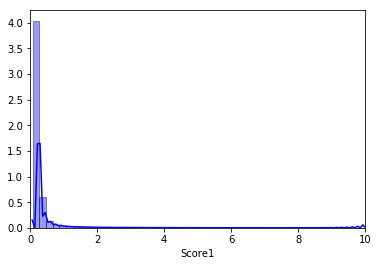

In [15]:
#sns.distplot(frauds4['Score1'],bins=50, kde=True)
#ax.set_yscale('log')
#plt.show()

xhigh = 10
plt.xlim(0,xhigh)
fg = frauds4[frauds4['Score1'] <= xhigh]
sns.distplot(fg['Score1'],bins = 50,kde = True, hist = True,
             color = 'blue', hist_kws={'edgecolor':'black'})
#plt.xticks([0, 400000, 800000, 1200000, 1600000,2000000])
#fullgraph.set_yscale('log')
plt.show

In [86]:
frauds3.dtypes

principal component 1     float64
principal component 2     float64
principal component 3     float64
principal component 4     float64
principal component 5     float64
principal component 6     float64
principal component 7     float64
principal component 8     float64
principal component 9     float64
principal component 10    float64
Score1                    float64
dtype: object

In [23]:
#import tensorflow as tf

In [24]:
#import keras


EnvironmentLocationNotFound: Not a conda environment: C:\Users\cheta\{sys.prefix}



In [19]:
frauds5.to_csv("PCACleaned.csv")

In [20]:
frauds2.to_csv("Score1Zscores.csv")